## ADVERTISEMENT CLICK CLASSIFICATION CASE STUDY

The goal of the case study is to learn from the historical data of advertisement clicks using machine learning and create a model to Predict who is going to click on the Advertisement on a website in future based on the user behaviour and user profile.

The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple classification algorithms
16. Selecting the best Model
17. Deploying the best model in production

### Reading the data into python

In this step, I will read the data and understand the details of the data.

Data Description

This data set contains the following features:

* VistID: The id for the user visit on website
* Time_Spent: Average time spent by user on site in minutes
* Age: User age in years
* Area_Income: Average Income of geographical area of user
* Internet_Usage: Average minutes a day user spent on the internet
* Ad_Topic: Headline of the advertisement
* Country_Name: Country of user
* City_Code: City of user
* Male: Whether or not user was male
* Time_Period: Time at which consumer clicked on Ad
* Weekday: Name of the day
* Month: Name of the months
* Year: Which year the data is collected
* Clicked: 0 means not clicked and 1 means that user clicked the Ad.

It has one file "Ad click data.csv". This file contains the historical data of various users and different ads which they were exposed to and if they have clicked on the ad or not?

The goal is to learn from this data and predict if a user will click on the ads on the website.

[you can download the data required for this case study ](https://thinkingneuron.com/wp-content/uploads/2021/07/Ad-click-data.zip)

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
main_data = pd.read_csv(r"C:\Users\vinsy\OneDrive\Desktop\Ad-click-data\Ad click data.csv")

In [11]:
main_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [12]:
main_data.shape

(6657, 14)

In [14]:
main_data.duplicated().sum()

0

In [15]:
main_data.columns

Index(['VistID', 'Time_Spent', 'Age', 'Avg_Income', 'Internet_Usage',
       'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period',
       'Weekday', 'Month', 'Year', 'Clicked'],
      dtype='object')

There are no duplicates to delete

### Defining the problem statement

**Create a Predictive model which can tell whether a logged in user will click on a given product advertisement or not?**

* **Target Variable**: Clicked
* **Predictors**: Time_Spent, Age, Avg_Income, Internet_Usage, Ad_Topic, Country_Name, City_code, Male, Time_Period, Weekday, M   Month, Year

* Clicked=1 means the ad was clicked.
* Clicked=0 means the ad was NOT clicked.

### Determining the type of Machine Learning

Based on the problem statement, it is a supervised ML classification model, as the target variable is categorical.

### Looking at the distribution of Target variable

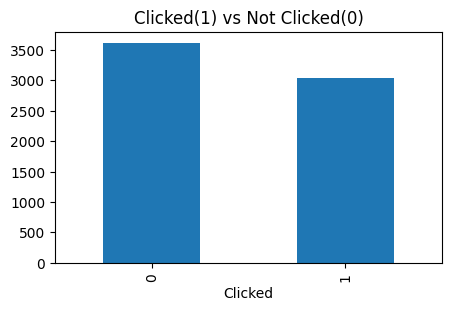

In [22]:
grouped_data = main_data.groupby('Clicked').size()
grouped_data.plot(kind='bar', figsize=(5,3), title='Clicked(1) vs Not Clicked(0)')
plt.show()

### Basic Data Exploration

In [23]:
main_data.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [24]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [25]:
main_data.describe(include='all')

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
count,6.657000e+03,6657.000000,6657.000000,6657.000000,6657.000000,6657,6657,6657,6657,6657,6657,6657,6657.0,6657.000000
unique,NaN,NaN,NaN,NaN,NaN,30,237,9,2,6,7,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,product_22,Canada,City_1,No,Evening,Friday,January,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,266,46,2559,3571,1266,986,988,NaN,NaN
mean,5.542115e+06,66.849548,37.258825,55930.486743,184.947684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.456362
std,2.596284e+06,15.509672,10.995458,13110.339257,43.189896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.498129
min,1.000187e+06,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
25%,3.307428e+06,55.200000,28.000000,48454.000000,145.730000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
50%,5.523907e+06,70.660000,36.000000,58183.000000,193.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.000000
75%,7.823942e+06,79.570000,46.000000,65957.000000,222.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,1.000000


In [26]:
main_data.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

### Removing useless variables from data

In [27]:
UselessColumns = ["VistID", "Country_Name" , "Year"]
main_data = main_data.drop(UselessColumns,axis=1)
main_data.head()

,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,City_code,Male,Time_Period,Weekday,Month,Clicked
0,87.97,43,55901.12,185.46,product_11,City_5,No,Mid-Night,Thursday,July,0
1,51.63,50,39132.00,176.73,product_8,City_1,No,Evening,Saturday,June,1
2,82.37,38,57032.36,210.60,product_6,City_2,No,Morning,Tuesday,January,0
3,62.06,45,48868.00,190.05,product_19,City_3,Yes,Morning,Thursday,April,1
4,77.66,31,61608.23,204.86,product_11,City_2,No,Noon,Thursday,January,0


### Visual Exploratory Data Analysis

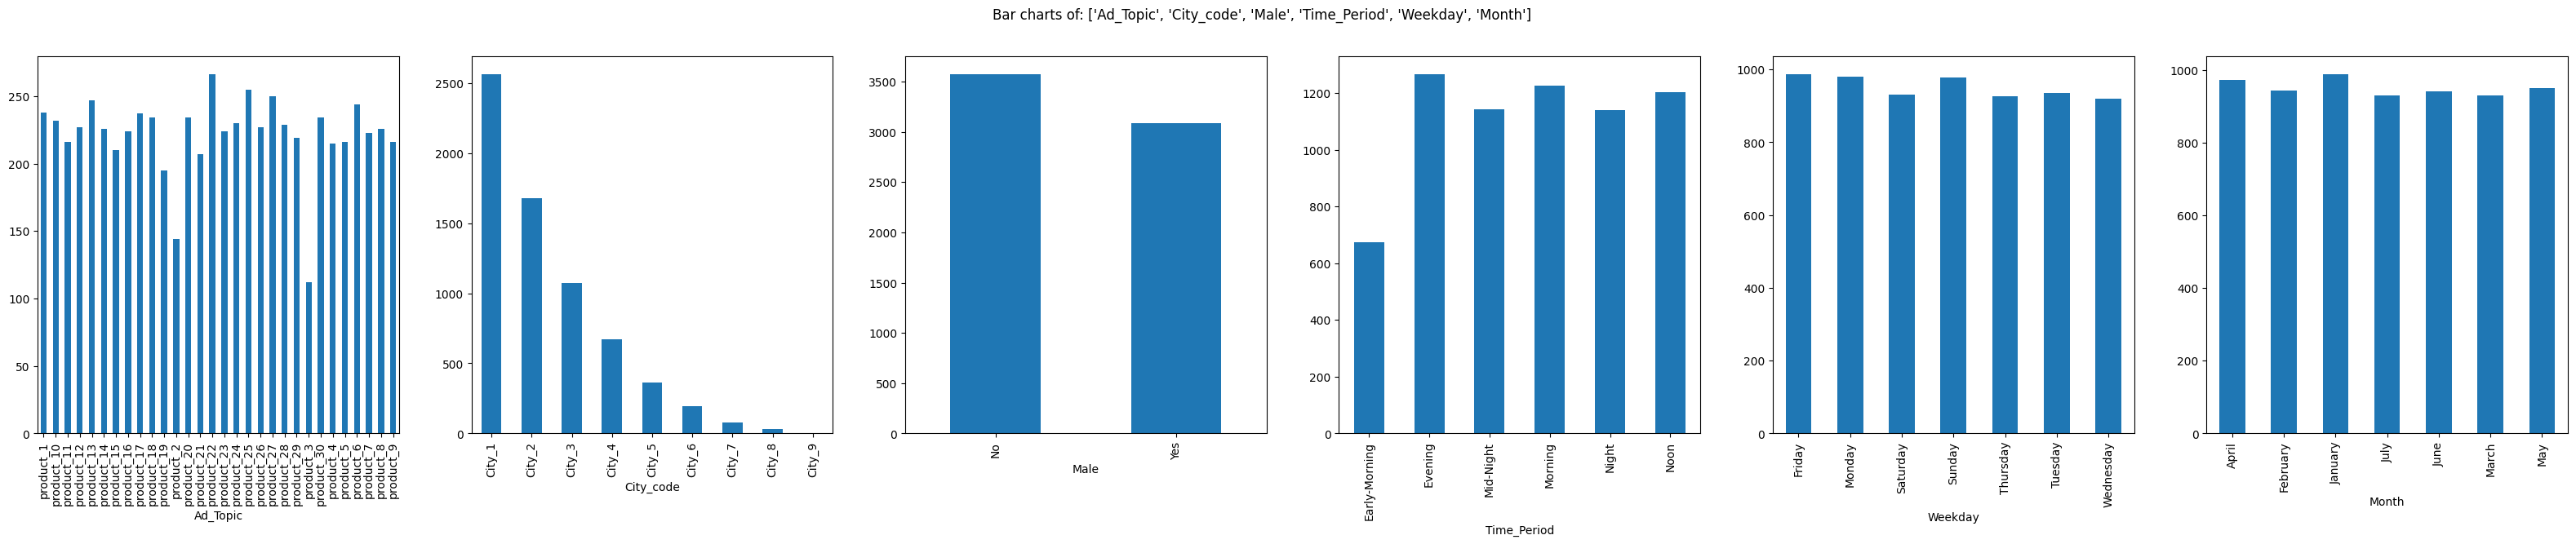

In [62]:
def PlotBarCharts(data, cols):

    fig, subPlot=plt.subplots(nrows=1, ncols=len(cols), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(cols))

    for colName, plotNumber in zip(cols, range(len(cols))):
        data.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

PlotBarCharts(data=main_data, cols=["Ad_Topic","City_code", "Male",
                                               "Time_Period", "Weekday","Month"])

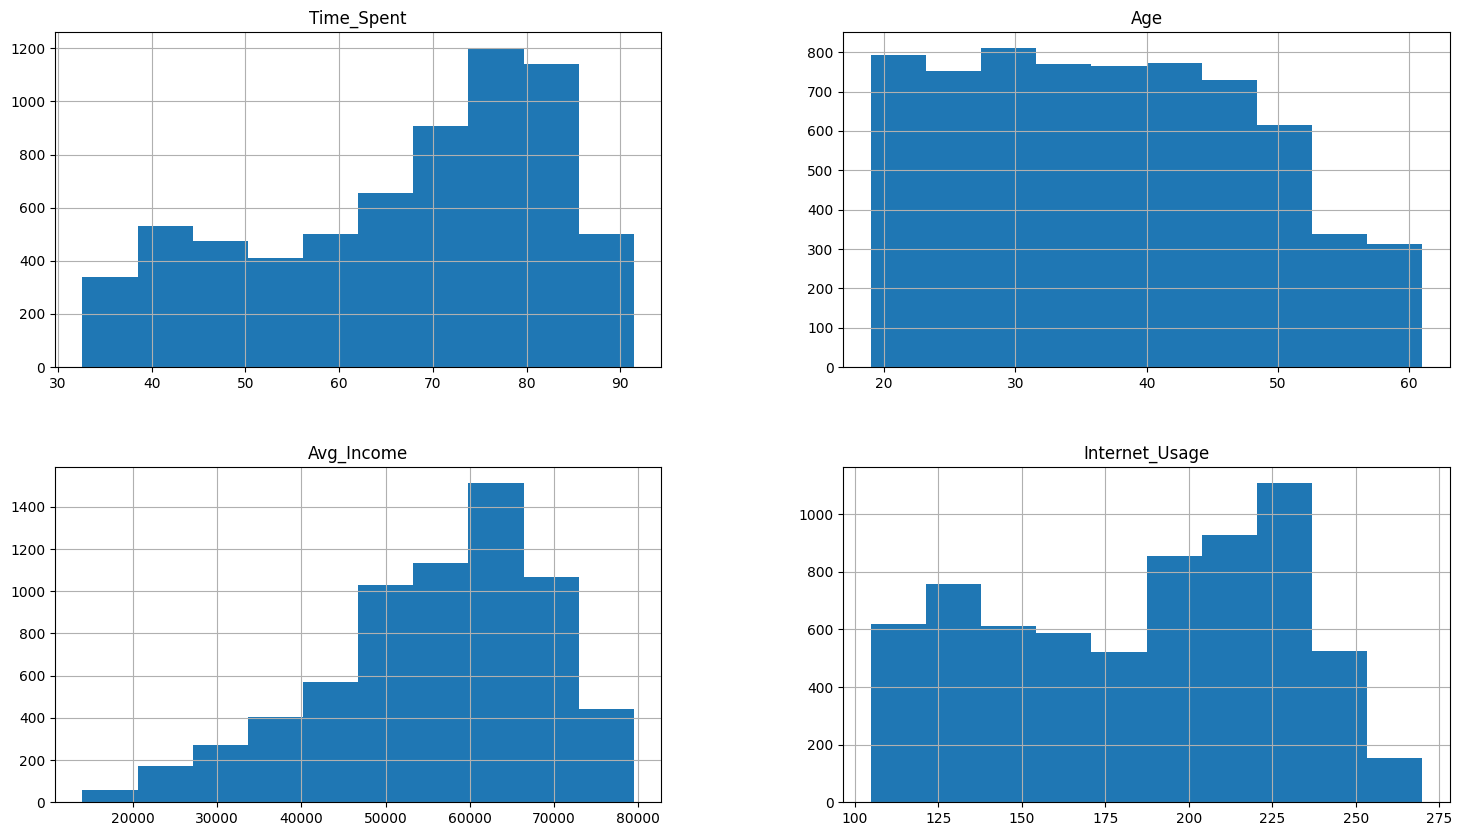

In [64]:
main_data.hist(["Time_Spent", "Age", "Avg_Income", "Internet_Usage"],figsize=(18,10))
plt.show()

In [65]:
main_data.isnull().sum()

Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Clicked           0
dtype: int64